# Cars_data_analysis

**Source:**https://www.kaggle.com/lepchenkov/usedcarscatalog

This dataset contains used car ads from one of the most popular online catalogs in the country (Belarus) in 2019.

**Content:**

manufacturer_name : The name of the manufacturer company.

model_name - The model name of the car.

transmission - Type of transmission.

Color - color of the car.

odometer_value - Number of kilometers travelled by the car.

year_produced - The production year of the car.

engine_fuel - fuel type of a engine.

engine_has_gas - Is the car equipped with propane tank and tubing?

engine_capacity - The capacity of the engine in liters.

body_type - Type of the body.

has_warranty - Does the car have warranty?

state - New/owned/emergency. Emergency means the car has been damaged, sometimes severely.

drivetrain - Front/rear/all drivetrain.

price_usd - The price of a car as listed in the catalog in USD.

is_exchangeable - If is_exchangeable is True the owner of the car is ready to exchange this car to other cars with little or no additional payment.

number_of_photos - Number of photos the car

up_counter - Number of times the car has been upped

feature_0 - Is the option like alloy wheels, conditioner, etc. is present in the car.

feature_1 - Is the option like alloy wheels, conditioner, etc. is present in the car.

feature_2 - Is the option like alloy wheels, conditioner, etc. is present in the car.

feature_3 - Is the option like alloy wheels, conditioner, etc. is present in the car.

feature_4 - Is the option like alloy wheels, conditioner, etc. is present in the car.

feature_5 - Is the option like alloy wheels, conditioner, etc. is present in the car.

feature_6 - Is the option like alloy wheels, conditioner, etc. is present in the car.

feature_7 - Is the option like alloy wheels, conditioner, etc. is present in the car.

feature_8 - Is the option like alloy wheels, conditioner, etc. is present in the car.

feature_9 - Is the option like alloy wheels, conditioner, etc. is present in the car.

duration_listed - Number of days the car is listed in the catalog.

**Objectives:**

1. which company cars are highest in sales?
2. what is the average duration for sale of a car?
3. In which year number of cars produced are for sale?
4. What is the correlation between the variables?
5. Applying Multiple Linear Regression, Lasso Regression, Ridge Regression and Elastic Net Regression.

**Procedure:**

1. Importing necessary libraries
2. Importing data set
3. Data preprocessing
4. Analysis
5. Conclusion

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf 
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
warnings.filterwarnings("ignore")

In [4]:
#importing the cars dataset and assign it to car
car = pd.read_csv("carsdata.csv")
#top 5 rows of the dataset
car.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [5]:
# information about the dataset
# There are missing values in engine_capacity
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37808 entries, 0 to 37807
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  37808 non-null  object 
 1   model_name         37808 non-null  object 
 2   transmission       37808 non-null  object 
 3   color              37808 non-null  object 
 4   odometer_value     37808 non-null  int64  
 5   year_produced      37808 non-null  int64  
 6   engine_fuel        37808 non-null  object 
 7   engine_has_gas     37808 non-null  bool   
 8   engine_type        37808 non-null  object 
 9   engine_capacity    37798 non-null  float64
 10  body_type          37808 non-null  object 
 11  has_warranty       37808 non-null  bool   
 12  state              37808 non-null  object 
 13  drivetrain         37808 non-null  object 
 14  price_usd          37808 non-null  float64
 15  is_exchangeable    37808 non-null  bool   
 16  number_of_photos   378

In [6]:
#summary of numerical variables
car.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,37808.000000,37808.000000,37798.000000,37808.000000,37808.000000,37808.000000,37808.000000
mean,250554.995556,2003.139812,2.061161,6725.535522,9.691176,16.282374,80.314193
std,134453.148819,7.785546,0.671991,6440.926072,6.099345,43.098161,111.815946
min,0.000000,1956.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,160000.000000,1998.000000,1.600000,2200.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4900.000000,8.000000,5.000000,59.000000
75%,325596.250000,2009.000000,2.300000,9000.000000,13.000000,16.000000,91.000000
max,1000000.000000,2019.000000,7.500000,50000.000000,86.000000,1861.000000,2232.000000


In [7]:
#missing value treatment
car.engine_capacity = car.engine_capacity.fillna(car.engine_capacity.mean())

In [8]:
# lower rows of the dataset
car.tail()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
37803,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
37804,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
37805,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
37806,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490
37807,Chrysler,Voyager,automatic,silver,297729,2000,gasoline,False,gasoline,2.4,...,False,False,False,False,False,False,False,False,True,632


In [9]:
#deleting variables"engine_has_gas","engine_type" and "model_name"
del car["engine_has_gas"]# similar variables are in the column "engine_fuel"
del car["engine_type"]# similar variables are in the column "engine_fuel" 
del car["model_name"]# Unnecessary variable

In [10]:
# Total number of rows and columns in the dataset
car.shape

(37808, 26)

In [11]:
#converting boolean variables true and false into numerical variables
car["feature_0"] = car["feature_0"]*1
car["feature_1"] = car["feature_1"]*1
car["feature_2"] = car["feature_2"]*1
car["feature_3"] = car["feature_3"]*1
car["feature_4"] = car["feature_4"]*1
car["feature_5"] = car["feature_5"]*1
car["feature_6"] = car["feature_6"]*1
car["feature_7"] = car["feature_7"]*1
car["feature_8"] = car["feature_8"]*1
car["feature_9"] = car["feature_9"]*1

In [12]:
# adding all the feature variables and creating new variable "features"
car["features"] = car.feature_0+car.feature_1+car.feature_2+car.feature_3+car.feature_4+car.feature_5+car.feature_6+car.feature_7+car.feature_8+car.feature_9

In [13]:
# deleting all the remaining feature variables
del car["feature_0"]
del car["feature_1"]
del car["feature_2"]
del car["feature_3"]
del car["feature_4"]
del car["feature_5"]
del car["feature_6"]
del car["feature_7"]
del car["feature_8"]
del car["feature_9"]

In [14]:
# grouping the "manufacturer_name" variable by using mean of the "duration_listed" variable
Duration = car.groupby("manufacturer_name").duration_listed.mean().sort_values(ascending = False).reset_index()
Duration

,manufacturer_name,duration_listed
0,Lincoln,231.638889
1,Moskvitch,165.236364
2,Acura,151.090909
3,Jaguar,139.132075
4,Lancia,135.641304
5,Jeep,134.439252
6,Mini,119.382353
7,Cadillac,115.232558
8,Porsche,111.049180
9,Saab,107.444444


In [15]:
#creating data frame for "year produced" and assigning it to df
df = pd.DataFrame(car[["year_produced"]])

In [16]:
#Histogram for the above data farme
df.iplot(kind='hist', bins = 50, bargap=0.5)
print("Highest cars (4042) are produced in the year between 1998-1999")

Highest cars (4042) are produced in the year between 1998-1999


In [17]:
#Creating new variable "years" by by substracting "year_produced" variable in 2019 
car["years"] = 2019-car.year_produced
#Deleting the year produced variable
del car["year_produced"]

In [18]:
# Average duration of a sale of a car is nearly 16 years
car["years"].mean()

15.86018831993229

In [19]:
#Creating barplot for the variable "years"
car.years.value_counts().sort_values(ascending=False).iplot(kind="bar")
print("2193 cars for sale which have age 21 and 2132 cars for sale which have age 11")

2193 cars for sale which have age 21 and 2132 cars for sale which have age 11


In [20]:
#bar plot for car car company names and with respct to their transmission
car_body=pd.crosstab(car['manufacturer_name'],car['transmission'])
car_body.iplot(kind="bar",barmode="stack")
print("VolksWagen and mechanical cars are more")

VolksWagen and mechanical cars are more


In [21]:
#bar plot for car car color and with respct to their body type
car_body=pd.crosstab(car['color'],car['body_type'])
car_body.iplot(kind="bar",barmode="stack")

Black colored cars with sedan body type are more

Percentage of owned cars is more compare to emergency and new cars


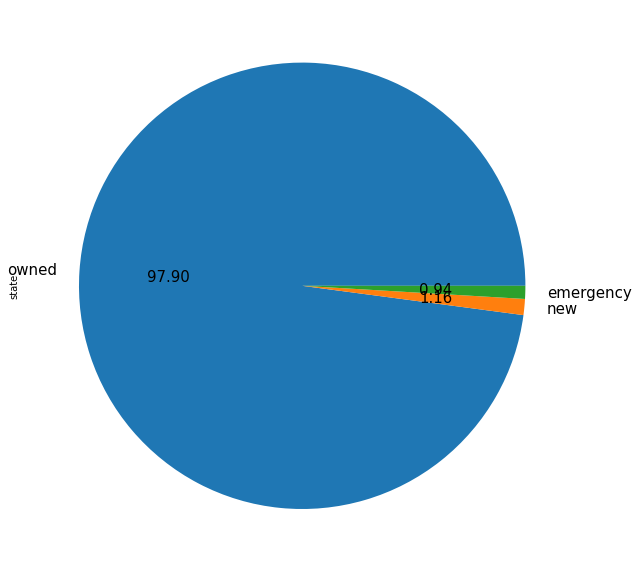

In [22]:
# Piechart for state of a cars
car["state"].value_counts().plot.pie(figsize = (10,15),autopct = "%.2f" ,fontsize = 15)
print("Percentage of owned cars is more compare to emergency and new cars")

In [23]:
# barplot for a body type of the cars
car_body=pd.crosstab(car['manufacturer_name'],car['engine_fuel'])
car_body.iplot(kind="bar",barmode="stack")
print("Gasoline and diesel cars are more")

Gasoline and diesel cars are more


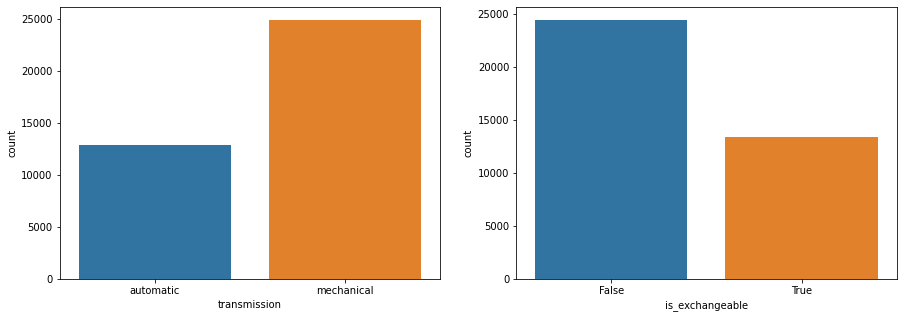

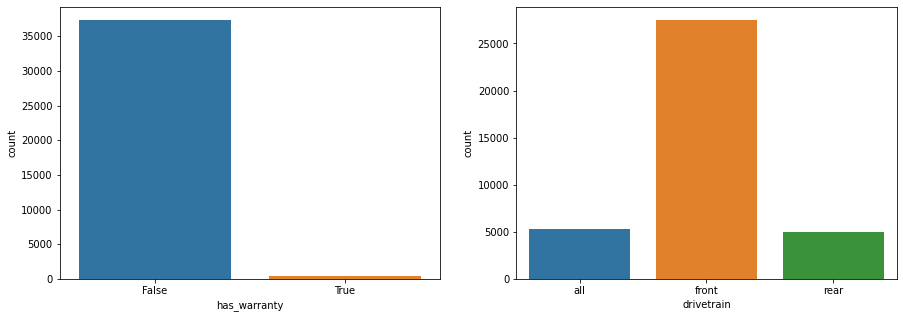

In [24]:
# creating barplots for categorical variables
cat_cols = ['transmission','is_exchangeable','has_warranty','drivetrain']
i=0
while i < 3:
    fig = plt.figure(figsize=[15,5])
     #ax1 = fig.add_subplot(121)
     #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(num_cols[i])
    plt.subplot(1,2,1)
    sb.countplot(x=cat_cols[i], data=car)
    i += 1
    
    
    #ax2.title.set_text(num_cols[i])
    plt.subplot(1,2,2)
    sb.countplot(x=cat_cols[i], data=car)
    i += 1
    
    plt.show()
    


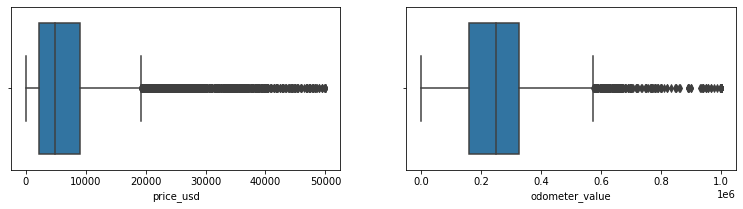

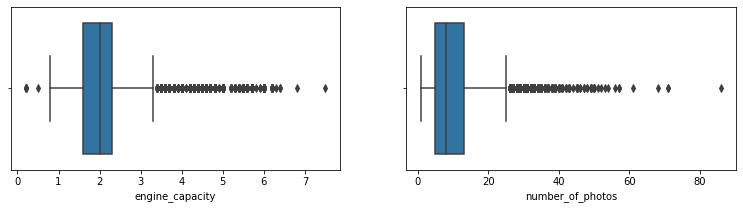

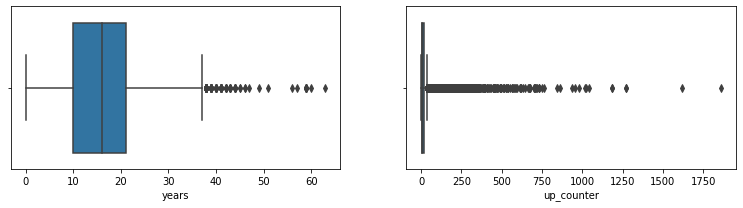

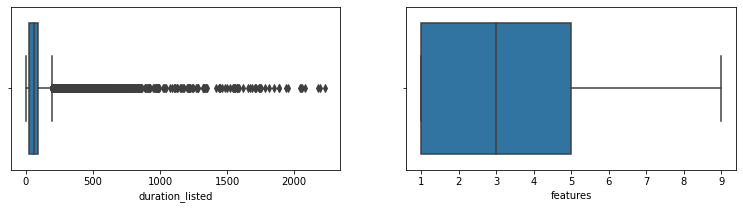

In [25]:
# representation of numerical variables by boxplot
num_cols = ["price_usd","odometer_value","engine_capacity","number_of_photos","years","up_counter","duration_listed","features"]
i=0
while i < 8:
    fig = plt.figure(figsize=[13,3])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    
    #ax1.title.set_text(num_cols[i])
    plt.subplot(1,2,1)
    sb.boxplot(x=num_cols[i], data=car)
    i += 1
    
    #ax2.title.set_text(num_cols[i])
    plt.subplot(1,2,2)
    sb.boxplot(x=num_cols[i], data=car)
    i += 1
    
    plt.show()

Numeric values have lot of outliers

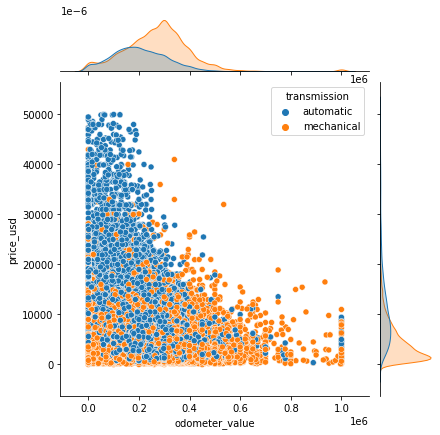

In [26]:
# scatterplot for price_usd and odometer value with respect to transmission
sb.jointplot(x = "odometer_value",y = "price_usd",hue = "transmission",data = car)

price_usd and odometer value are negatively correlated.

In [27]:
#car[car["price_usd"] > car["price_usd"].quantile(0.99)].sort_values(by = "price_usd",ascending = False)
uv = np.percentile(car.price_usd,[99])[0]
uv

33000.0

In [28]:
#selecting columns and assigning as features
features = ["price_usd","odometer_value","engine_capacity","number_of_photos","years","up_counter","duration_listed","features"]

In [29]:
#importing the necessary library for the outlier treatment
from scipy import stats

In [30]:
#cpping
car_cap = car.copy()

In [31]:
#outlier treatment
def percentile_capping(car,cols, from_low_end, from_high_end):
    for col in cols:
        lower_bound = car[col].quantile(from_low_end)
        upper_bound = car[col].quantile(1-from_high_end)
        
        car[col] = np.where(car[col]>upper_bound,upper_bound,np.where(car[col]<lower_bound,lower_bound,car[col]))
        #stats.mstats.winsorize(a = car[col], limits = (from_low_end, from_high_end))



In [32]:
#capping and floring
percentile_capping(car_cap,features,0.01,0.01)

In [33]:
car_cap.describe()

,odometer_value,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed,features,years
count,37808.000000,37808.000000,37808.000000,37808.000000,37808.000000,37808.000000,37808.000000,37808.000000
mean,248266.040682,2.056835,6664.248789,9.639177,14.648461,76.864538,3.402693,15.827444
std,124582.946908,0.642804,6132.292051,5.857658,25.148017,82.911387,2.586100,7.687560
min,0.000000,1.100000,350.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,160000.000000,1.600000,2200.000000,5.000000,2.000000,23.000000,1.000000,10.000000
50%,250000.000000,2.000000,4900.000000,8.000000,5.000000,59.000000,3.000000,16.000000
75%,325596.250000,2.300000,9000.000000,13.000000,16.000000,91.000000,5.000000,21.000000
max,647321.900000,4.700000,33000.000000,30.000000,162.000000,511.930000,9.000000,34.000000


In [34]:
#renaming car_cap dataframe as car
car = car_cap

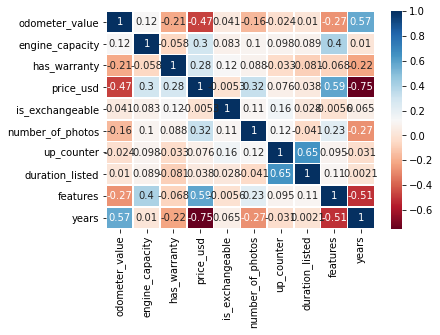

In [35]:
#heat map for correlation between variables
sb.heatmap(car.corr(), annot=True, cmap="RdBu",linewidths=0.5)
plt.show()

1. price_usd and Years are highly negatively correlated.
2. up_counter and duration listed are Higly positively correlated.
3. features and years are negatively correlated.
4. price_usd and odometer_value are negatively correlated.
5. odometer_value and years are negatively correlated.


In [36]:
car.describe()

,odometer_value,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed,features,years
count,37808.000000,37808.000000,37808.000000,37808.000000,37808.000000,37808.000000,37808.000000,37808.000000
mean,248266.040682,2.056835,6664.248789,9.639177,14.648461,76.864538,3.402693,15.827444
std,124582.946908,0.642804,6132.292051,5.857658,25.148017,82.911387,2.586100,7.687560
min,0.000000,1.100000,350.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,160000.000000,1.600000,2200.000000,5.000000,2.000000,23.000000,1.000000,10.000000
50%,250000.000000,2.000000,4900.000000,8.000000,5.000000,59.000000,3.000000,16.000000
75%,325596.250000,2.300000,9000.000000,13.000000,16.000000,91.000000,5.000000,21.000000
max,647321.900000,4.700000,33000.000000,30.000000,162.000000,511.930000,9.000000,34.000000


In [37]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37808 entries, 0 to 37807
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  37808 non-null  object 
 1   transmission       37808 non-null  object 
 2   color              37808 non-null  object 
 3   odometer_value     37808 non-null  float64
 4   engine_fuel        37808 non-null  object 
 5   engine_capacity    37808 non-null  float64
 6   body_type          37808 non-null  object 
 7   has_warranty       37808 non-null  bool   
 8   state              37808 non-null  object 
 9   drivetrain         37808 non-null  object 
 10  price_usd          37808 non-null  float64
 11  is_exchangeable    37808 non-null  bool   
 12  number_of_photos   37808 non-null  float64
 13  up_counter         37808 non-null  float64
 14  duration_listed    37808 non-null  float64
 15  features           37808 non-null  float64
 16  years              378

In [38]:
# converting the variables boolean into integers
car['has_warranty'] = car['has_warranty']*1
car['is_exchangeable'] = car['is_exchangeable']*1

In [39]:
#deleting unnecassry variable
del car['manufacturer_name']

In [40]:
#getting dummy variables for the categorical variables
car = pd.get_dummies(car)

In [41]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37808 entries, 0 to 37807
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   odometer_value             37808 non-null  float64
 1   engine_capacity            37808 non-null  float64
 2   has_warranty               37808 non-null  int32  
 3   price_usd                  37808 non-null  float64
 4   is_exchangeable            37808 non-null  int32  
 5   number_of_photos           37808 non-null  float64
 6   up_counter                 37808 non-null  float64
 7   duration_listed            37808 non-null  float64
 8   features                   37808 non-null  float64
 9   years                      37808 non-null  float64
 10  transmission_automatic     37808 non-null  uint8  
 11  transmission_mechanical    37808 non-null  uint8  
 12  color_black                37808 non-null  uint8  
 13  color_blue                 37808 non-null  uin

In [42]:
#deleting the variables which are not usable after creating the dummy variables
del car['transmission_automatic']
del car['color_orange']
del car['engine_fuel_hybrid-petrol']
del car['body_type_limousine']
del car['state_emergency']
del car['drivetrain_rear']

In [43]:
# Creating the dependant and independent variables
y = car['price_usd'] #predict / dependent variable 
x = car.drop(columns = ['price_usd']) #independent variables 

In [44]:
#Separating the dataset into training data and test data
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25,random_state = 101)

In [45]:
#Scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.46769492,  0.68943432, -0.10950541, ...,  0.14636853,
         2.47281037, -1.63204347],
       [ 0.33499377,  1.46728689, -0.10950541, ...,  0.14636853,
         2.47281037, -1.63204347],
       [ 1.2340051 ,  0.68943432, -0.10950541, ...,  0.14636853,
         2.47281037, -1.63204347],
       ...,
       [ 3.20317625,  2.24513946, -0.10950541, ...,  0.14636853,
        -0.40439817,  0.61272878],
       [-1.83226569, -0.08841825, -0.10950541, ...,  0.14636853,
        -0.40439817,  0.61272878],
       [ 0.39703358,  0.53386381, -0.10950541, ...,  0.14636853,
        -0.40439817,  0.61272878]])

# Linear_regression

In [48]:
#fitting linear regression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [49]:
#predicting test set
pred = reg.predict(x_test)

In [50]:
#importing necessary libraries
from sklearn.metrics import mean_squared_error
from math import sqrt

In [51]:
#root mean square error
rmse=sqrt(mean_squared_error(y_test,pred))
rmse

3002.1868341181466

In [52]:
#r-square value of test set
r_squared_test=r2_score(y_test, pred)
r_squared_test

0.7620812418152766

In [53]:
#adjusted r-square value of test set
adjusted_r_squared_test = 1 - (1-r_squared_test)*(len(y)-1)/(len(y)-x.shape[1]-1)
adjusted_r_squared_test

0.7618229494601007

In [54]:
filename = 'finalized_model.pickle'
pickle.dump(reg, open(filename, 'wb'))

In [55]:
#r-square value of train set
r_squared_train=reg.score(x_train,y_train)
r_squared_train

0.7574305061573958

In [56]:
#adjusted r-square value of train set
adjusted_r_squared_train = 1 - (1-r_squared_train)*(len(y)-1)/(len(y)-x.shape[1]-1)
adjusted_r_squared_train

0.7571671648120708

1. r-square value for training set:75.74%
2. adjusted r-square value for training data set: 75.71%
3. r-square value for test set:76.20%
4. adjusted r-square value for test data set:76.18%
5. rmse : 3002.18683411647

# Regularization

In [57]:
#defining adjusted r-square
def adj_r2(x,y,model):    
    r2 = model.score(x,y) # r-square
    n = x.shape[0]
    p = x.shape[1]
    adj_r2 = 1-(1-r2)*(n-1)/(n-p-1) #adjusted r-square
    return adj_r2    

Linear Regression

In [58]:
# r-square value of training set
reg.score(x_train,y_train)

0.7574305061573958

In [59]:
# adjusted r-square value of training set
adj_r2(x_train,y_train,reg)

0.7570792541531737

In [60]:
# r-square value of test set
reg.score(x_test,y_test)

0.7620812418152766

In [61]:
#adjusted r-square value of test set
adj_r2(x_test,y_test,reg)

0.7610446138571922

In [62]:
#mean square error
mse = mean_squared_error(y_test,reg.predict(x_test))
mse

9013125.786952341

1. adjusted r-square value for training data set: 75.70%
2. adjusted r-square value for test data set:76.10%
3. mse : 9013125.786942273

# Lasso_regression

In [63]:
#importing necessary libraries
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV 
lasso=Lasso()

#parameters
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,200,300,1.1,0.9,0.8,0.7,0.5,0.4,0.3,0.2,0.33]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)#cross validation

lasso_regressor.fit(x,y)#fitting the resgression
print(lasso_regressor.best_params_)#printing the suitable alpha value
print(lasso_regressor.best_score_)#MSE value with respect to alpha value

{'alpha': 1.1}
-9786625.312434504


Best alpha value is 1.1 & MSE is 9786625.3124345

In [64]:
# asiigning alpha value to "lasso_alpha"
lasso_alpha=1.1

In [65]:
#fiting the lasso regresion
lasso_reg = Lasso(lasso_alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=1.1)

In [66]:
#r-square value for training set
r2 = lasso_reg.score(x_train,y_train)
r2

0.757205247359618

In [67]:
#adjusted r-square value for training set
adj_r2(x_train,y_train,lasso_reg)

0.7568536691700914

In [68]:
#adjusted r-square value for test set
adj_r2(x_test,y_test,lasso_reg)

0.7609433009674517

1. adjusted r-square value for training data set: 75.74%
2. adjusted r-square value for test data set:76.11%
3. mse : 9786625.3124345

# Ridge_Regression

In [69]:
#importing necessary varioables
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,101,220,219,215,210,207,208,206,205]} #hyper parameters
ridge_regress = GridSearchCV(ridge,parameters,scoring = "neg_mean_squared_error",cv = 5) #Cross validation
ridge_regress.fit(x,y) #fit the ridge regression with respect to ridge regression
print(ridge_regress.best_params_) #printing the suitable alpha value
print(ridge_regress.best_score_ )#MSE value with respect to alpha value

{'alpha': 10}
-9788645.675226945


Best alpha value is 10 & MSE is 9788645.675226953

In [70]:
# asiigning alpha value to "ridge_alpha"
ridge_alpha = 10

In [71]:
# fitting ridge regression
ridge_reg = Ridge(ridge_alpha)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=10)

In [72]:
# r-square value for training set
r2 = ridge_reg.score(x_train,y_train)
r2

0.7572907305965156

In [73]:
# adjusted r-sqaure value for training set
adj_r2(x_train,y_train,ridge_reg)

0.7569392761907254

In [74]:
# adjusted r-sqaure value for test set
adj_r2(x_test,y_test,ridge_reg)

0.7608896131617564

1. adjusted r-square value for training data set: 75.70%
2. adjusted r-square value for test data set:76.10%
3. mse : 9788645.675226953

# ElasticNet_regression

In [75]:
#importig necessary libararies
from sklearn.linear_model  import  ElasticNetCV
from sklearn.linear_model  import  ElasticNet
elasticCV = ElasticNetCV(alphas = None, cv =5)# Cross Validation

elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=5)

In [76]:
#getting alpha value
elastic_alpha=elasticCV.alpha_
elastic_alpha

711849.1388258111

In [77]:
#fittting elasticnet regression
elasticnet_reg = ElasticNet(alpha = elastic_alpha)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=711849.1388258111)

In [78]:
#r-square value for training set
elasticnet_reg.score(x_train, y_train)

0.21851759796100112

In [79]:
#adjusted r-square value for training set
adj_r2(x_train,y_train,elasticnet_reg)

0.21738597478929822

In [80]:
#adjusted r-square value for test set
adj_r2(x_test,y_test,elasticnet_reg)

0.22490543090977

There is no much differnce in mse and r-square value of linear, lasso and ridge regression models we can conclude that model has been well trained over the training data.  
But elastic net is not best model for this dataset beccause r-square value is less compare to other regression models.

# Decision Tree

In [81]:
#importing the necessary libraries
from sklearn.tree import DecisionTreeRegressor,export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

In [82]:
#Decision tree
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [83]:
#prediction
dt.score(x_test,y_test)

0.7984021204808968

# Random forest

In [84]:
# Random Forest
rand_for = RandomForestRegressor()
rand_for.fit(x_train,y_train)

RandomForestRegressor()

In [85]:
#Hyper parameter tuning
grid_param = {'max_features' : ['auto','log2']}

In [86]:
grid_search = GridSearchCV(estimator = rand_for, param_grid = grid_param, cv = 5, n_jobs = -1, verbose = 3)

In [87]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_features': ['auto', 'log2']}, verbose=3)

In [88]:
# best parameter
grid_search.best_params_

{'max_features': 'auto'}

In [89]:
rand_reg = RandomForestRegressor(max_depth = 12,
 max_features = 'log2', 
 min_samples_leaf = 1,
 min_samples_split= 5,
 n_estimators = 90,random_state=6)

In [90]:
rand_reg.fit(x_train,y_train)

RandomForestRegressor(max_depth=12, max_features='log2', min_samples_split=5,
                      n_estimators=90, random_state=6)

In [91]:
rand_reg.fit(x_test,y_test)

RandomForestRegressor(max_depth=12, max_features='log2', min_samples_split=5,
                      n_estimators=90, random_state=6)

In [92]:
#Prediction
rand_reg.score(x_test,y_test)

0.9162658178125458

# Stacking

In [106]:
train,val_train,test,val_test = train_test_split(x_scaled,y, test_size = 0.5,random_state = 101)

In [107]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(train,test,test_size = 0.2,random_state = 101)

In [108]:
reg.fit(x_train1,y_train1)

LinearRegression()

In [109]:
dt.fit(x_train1,y_train1)

DecisionTreeRegressor()

In [110]:
predicted_val1 = reg.predict(val_train)
predicted_val2 = dt.predict(val_train)

In [111]:
predict_val = np.column_stack((predicted_val1,predicted_val2))
predict_val

array([[ 6942.53807985,  4800.        ],
       [15569.24881296, 10550.        ],
       [10592.84152181,  8999.        ],
       ...,
       [ 3944.50558047,  3800.        ],
       [ 5720.4026989 ,  6300.        ],
       [ 7711.54618929,  4900.        ]])

In [112]:
predicted_test1 = reg.predict(x_test1)
predicted_test2 = dt.predict(x_test1)

In [113]:
predict_test = np.column_stack((predicted_test1,predicted_test2))
predict_test

array([[17844.67948574, 15800.        ],
       [ 6279.3928779 , 16500.        ],
       [ 3202.17262321,   599.        ],
       ...,
       [ 5049.05198716,  1150.        ],
       [ -880.69910371,  2000.        ],
       [18250.18624852, 20700.        ]])

In [114]:
rand_reg = RandomForestRegressor()

In [115]:
rand_reg.fit(predict_val,val_test)

RandomForestRegressor()

In [130]:
rand_reg.score(predict_test,y_test1)

0.8443411187401185

# Ada Boost

In [117]:
from sklearn.ensemble import AdaBoostRegressor

In [118]:
ada = AdaBoostRegressor()

model = ada.fit(x_train,y_train)

In [119]:
y_pred = model.fit(x_test,y_test)
y_pred

AdaBoostRegressor()

In [120]:
y_pred.score(x_test,y_test)

0.6100856655295117

# Gradeint Boost

In [121]:
from sklearn.ensemble import GradientBoostingRegressor

In [122]:
grad = GradientBoostingRegressor()
grad.fit(x_train,y_train)

GradientBoostingRegressor()

In [123]:
grad.score(x_test,y_test)

0.8884417587409158

# XG Boost

In [124]:
import xgboost as xgb
from xgboost import XGBRegressor

In [125]:
xg = XGBRegressor()
xg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [126]:
xg.score(x_test,y_test)

0.900060806584381

In [127]:
#Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
param_grid={
   'learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
    
}

In [128]:
grid= GridSearchCV(XGBRegressor(),param_grid, verbose=3)
grid

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
      

In [129]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END ..learning_rate=1, max_depth=3, n_estimators=10; total time=   0.1s
[CV 2/5] END ..learning_rate=1, max_depth=3, n_estimators=10; total time=   0.1s
[CV 3/5] END ..learning_rate=1, max_depth=3, n_estimators=10; total time=   0.1s
[CV 4/5] END ..learning_rate=1, max_depth=3, n_estimators=10; total time=   0.1s
[CV 5/5] END ..learning_rate=1, max_depth=3, n_estimators=10; total time=   0.1s
[CV 1/5] END ..learning_rate=1, max_depth=3, n_estimators=50; total time=   0.5s
[CV 2/5] END ..learning_rate=1, max_depth=3, n_estimators=50; total time=   0.4s
[CV 3/5] END ..learning_rate=1, max_depth=3, n_estimators=50; total time=   0.5s
[CV 4/5] END ..learning_rate=1, max_depth=3, n_estimators=50; total time=   0.4s
[CV 5/5] END ..learning_rate=1, max_depth=3, n_estimators=50; total time=   0.6s
[CV 1/5] END .learning_rate=1, max_depth=3, n_estimators=100; total time=   1.3s
[CV 2/5] END .learning_rate=1, max_depth=3, n_e

[CV 2/5] END learning_rate=0.5, max_depth=5, n_estimators=10; total time=   0.1s
[CV 3/5] END learning_rate=0.5, max_depth=5, n_estimators=10; total time=   0.1s
[CV 4/5] END learning_rate=0.5, max_depth=5, n_estimators=10; total time=   0.1s
[CV 5/5] END learning_rate=0.5, max_depth=5, n_estimators=10; total time=   0.1s
[CV 1/5] END learning_rate=0.5, max_depth=5, n_estimators=50; total time=   0.7s
[CV 2/5] END learning_rate=0.5, max_depth=5, n_estimators=50; total time=   0.8s
[CV 3/5] END learning_rate=0.5, max_depth=5, n_estimators=50; total time=   0.7s
[CV 4/5] END learning_rate=0.5, max_depth=5, n_estimators=50; total time=   0.7s
[CV 5/5] END learning_rate=0.5, max_depth=5, n_estimators=50; total time=   0.7s
[CV 1/5] END learning_rate=0.5, max_depth=5, n_estimators=100; total time=   1.4s
[CV 2/5] END learning_rate=0.5, max_depth=5, n_estimators=100; total time=   1.5s
[CV 3/5] END learning_rate=0.5, max_depth=5, n_estimators=100; total time=   1.5s
[CV 4/5] END learning_rat

[CV 3/5] END learning_rate=0.1, max_depth=10, n_estimators=10; total time=   0.4s
[CV 4/5] END learning_rate=0.1, max_depth=10, n_estimators=10; total time=   0.4s
[CV 5/5] END learning_rate=0.1, max_depth=10, n_estimators=10; total time=   0.4s
[CV 1/5] END learning_rate=0.1, max_depth=10, n_estimators=50; total time=   2.2s
[CV 2/5] END learning_rate=0.1, max_depth=10, n_estimators=50; total time=   2.1s
[CV 3/5] END learning_rate=0.1, max_depth=10, n_estimators=50; total time=   1.9s
[CV 4/5] END learning_rate=0.1, max_depth=10, n_estimators=50; total time=   2.0s
[CV 5/5] END learning_rate=0.1, max_depth=10, n_estimators=50; total time=   1.9s
[CV 1/5] END learning_rate=0.1, max_depth=10, n_estimators=100; total time=   3.7s
[CV 2/5] END learning_rate=0.1, max_depth=10, n_estimators=100; total time=   3.7s
[CV 3/5] END learning_rate=0.1, max_depth=10, n_estimators=100; total time=   3.7s
[CV 4/5] END learning_rate=0.1, max_depth=10, n_estimators=100; total time=   3.6s
[CV 5/5] END

[CV 3/5] END learning_rate=0.01, max_depth=20, n_estimators=10; total time=   0.8s
[CV 4/5] END learning_rate=0.01, max_depth=20, n_estimators=10; total time=   0.8s
[CV 5/5] END learning_rate=0.01, max_depth=20, n_estimators=10; total time=   0.9s
[CV 1/5] END learning_rate=0.01, max_depth=20, n_estimators=50; total time=   4.3s
[CV 2/5] END learning_rate=0.01, max_depth=20, n_estimators=50; total time=   4.3s
[CV 3/5] END learning_rate=0.01, max_depth=20, n_estimators=50; total time=   5.9s
[CV 4/5] END learning_rate=0.01, max_depth=20, n_estimators=50; total time=   5.0s
[CV 5/5] END learning_rate=0.01, max_depth=20, n_estimators=50; total time=   4.2s
[CV 1/5] END learning_rate=0.01, max_depth=20, n_estimators=100; total time=  10.0s
[CV 2/5] END learning_rate=0.01, max_depth=20, n_estimators=100; total time=   9.7s
[CV 3/5] END learning_rate=0.01, max_depth=20, n_estimators=100; total time=  10.0s
[CV 4/5] END learning_rate=0.01, max_depth=20, n_estimators=100; total time=   9.8s


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
      

In [131]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

In [132]:
#create new model
new_model=XGBRegressor(learning_rate = 0.1, max_depth = 5, n_estimators = 200)
new_model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [133]:
new_model.score(x_train,y_train)

0.9301640490273015

In [134]:
new_model.score(x_test,y_test)

0.9025757031313105